In [1]:


import torch
import numpy as np
%load_ext autoreload
%autoreload 2
import pinot
import math
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Using backend: pytorch


In [2]:
# define the target
f = lambda x: torch.sin(x)

x_tr = torch.tensor(np.concatenate(
    [
        np.linspace(-3 * math.pi, -math.pi, 50),
        np.linspace(math.pi, 3 * math.pi, 50)
    ]),
    dtype=torch.float32)[:, None]

x_te = torch.tensor(np.concatenate(
    [
        np.linspace(-7 * math.pi, -3 * math.pi, 100),
        np.linspace(-math.pi, math.pi, 50),
        np.linspace(3 * math.pi, 7 * math.pi, 100)
    ]),
    dtype=torch.float32)[:, None]

x = torch.tensor(np.linspace(-7 * math.pi, 7 * math.pi, 375),
                 dtype=torch.float32)[:, None]


y_tr = f(x_tr)
y_te = f(x_te)
y = f(x)

In [3]:
x.shape

torch.Size([375, 1])

In [42]:
base_kernel=pinot.inference.gp.kernels.rbf.RBF()

kernel = pinot.inference.gp.kernels.deep_kernel.DeepKernel(
    lambda x:x,
    base_kernel=base_kernel)

gpr = pinot.inference.gp.gpr.sparse_variational_gpr.SVGPR(
    kernel, 
    log_sigma=0.0,
    n_inducing_points=100,
    initializer_std=0.001,
    in_features=50,
    kl_loss_scaling=0.0,
    grid_boundary=30)

In [43]:
gpr.kernel.representation(x).shape

torch.Size([375, 1])

In [44]:
# opt = torch.optim.Adam(gpr.parameters(), 1e-3)
for _ in range(1000):
    opt.zero_grad()
    loss = gpr.loss(x_tr, y_tr).sum()
    loss.backward()
    print(loss)
    opt.step()

/Users/wangy1/Documents/GitHub/pinot/pinot/inference/gp/gpr/sparse_variational_gpr.py:66: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  torch.range(0, self.f_u_s_diag.shape[0]-1)[:, None],
/Users/wangy1/Documents/GitHub/pinot/pinot/inference/gp/gpr/sparse_variational_gpr.py:67: UserWarning: torch.range is deprecated in favor of torch.arange and will be removed in 0.5. Note that arange generates values in [start; end), not [start; end].
  torch.range(0, self.f_u_s_diag.shape[0]-1)[None, :])


tensor(10858.3594, grad_fn=<SumBackward0>)
tensor(10858.3594, grad_fn=<SumBackward0>)
tensor(10858.3594, grad_fn=<SumBackward0>)
tensor(10858.3594, grad_fn=<SumBackward0>)
tensor(10858.3594, grad_fn=<SumBackward0>)
tensor(10858.3594, grad_fn=<SumBackward0>)
tensor(10858.3594, grad_fn=<SumBackward0>)
tensor(10858.3594, grad_fn=<SumBackward0>)
tensor(10858.3594, grad_fn=<SumBackward0>)
tensor(10858.3594, grad_fn=<SumBackward0>)
tensor(10858.3594, grad_fn=<SumBackward0>)
tensor(10858.3594, grad_fn=<SumBackward0>)
tensor(10858.3594, grad_fn=<SumBackward0>)
tensor(10858.3594, grad_fn=<SumBackward0>)
tensor(10858.3594, grad_fn=<SumBackward0>)
tensor(10858.3594, grad_fn=<SumBackward0>)
tensor(10858.3594, grad_fn=<SumBackward0>)
tensor(10858.3594, grad_fn=<SumBackward0>)
tensor(10858.3594, grad_fn=<SumBackward0>)
tensor(10858.3594, grad_fn=<SumBackward0>)
tensor(10858.3594, grad_fn=<SumBackward0>)
tensor(10858.3594, grad_fn=<SumBackward0>)
tensor(10858.3594, grad_fn=<SumBackward0>)
tensor(1085

KeyboardInterrupt: 

In [ ]:
gpr.condition(x)

In [23]:
y_hat_distribution = gpr.condition(x)


In [28]:
y_hat_distribution.sample()

tensor([-0.8403, -1.0737, -0.9956, -1.0826, -0.8954, -1.1363, -1.3337, -1.1057,
        -1.1437, -1.7245, -1.8034, -1.8753, -1.8871, -1.8251, -2.0800, -2.0151,
        -0.2609,  0.6834,  1.8046,  2.4477,  3.3544,  2.3381,  1.6067,  1.7197,
         1.4271,  0.8381,  0.8740,  0.6011,  0.4997,  0.5229, -1.4056, -1.5868,
        -1.8875, -1.6768, -1.9963, -2.3167, -2.1012, -2.1673, -2.5306, -2.4687,
        -2.5126, -2.2760, -2.7311, -2.5328,  0.2778,  0.3202,  0.7767,  0.2780,
         0.0933,  0.0127,  0.0391, -0.2539,  0.1116, -0.2697,  0.1832, -0.2645,
        -0.3420, -0.4937, -0.6549, -0.6352, -0.9660, -0.6367, -0.8005, -0.9457,
        -0.7943, -1.6509, -0.8647, -0.8000, -1.3492, -1.2112, -1.9290, -1.6124,
        -1.5159, -1.4224, -1.5935, -1.6649, -2.0551, -0.2876, -1.0067, -1.1006,
        -0.5718, -0.5965, -0.3075, -0.3795,  0.0967,  0.0398, -0.0137, -0.1214,
         0.0236,  0.6184,  0.9585,  0.9943,  0.9327,  0.5858,  0.9844,  1.4490,
         1.4123,  1.1222,  1.5187,  0.58

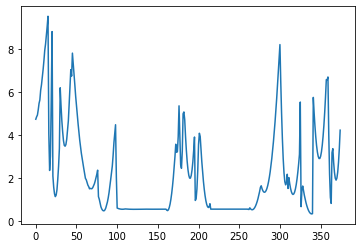

In [41]:
from matplotlib import pyplot as plt
plt.plot(y_hat_distribution.variance.detach())

In [25]:
def plot():
    from pinot.inference.utils import confidence_interval
    from matplotlib import pyplot as plt

    plt.figure(figsize=(10, 6))
    # y_hat_distribution = pinot.inference.utils.condition_mixture(net, x, sampler=opt, n_samples=1000)

    nll = y_hat_distribution.log_prob(y).mean() / float(y.shape[0])

    plt.plot(x.flatten(), y_hat_distribution.mean.detach().numpy().flatten(), c='k', linewidth=5)

    low, high = confidence_interval(y_hat_distribution, 0.95, n_samples=10)
    plt.fill_between(x.flatten(), low.flatten().detach(), high.flatten().detach(), color='k', alpha=0.1)
    
    low, high = confidence_interval(y_hat_distribution, 0.75, n_samples=10)
    plt.fill_between(x.flatten(), low.flatten().detach(), high.flatten().detach(), color='k', alpha=0.2)

    low, high = confidence_interval(y_hat_distribution, 0.50, n_samples=10)
    plt.fill_between(x.flatten(), low.flatten().detach(), high.flatten().detach(), color='k', alpha=0.3)

    low, high = confidence_interval(y_hat_distribution, 0.25, n_samples=10)
    plt.fill_between(x.flatten(), low.flatten().detach(), high.flatten().detach(), color='k', alpha=0.4)

    plt.scatter(x_te, y_te, label='te')
    plt.scatter(x_tr, y_tr, label='tr')
    plt.legend()
    plt.ylim(-2, 2)
    plt.title('NLL=%s' % nll.detach().numpy().round(3))

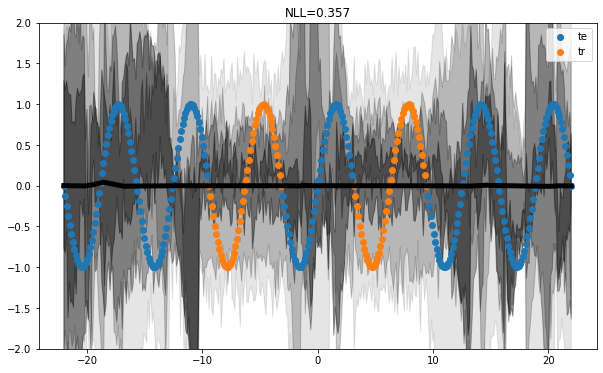

In [26]:
plot()

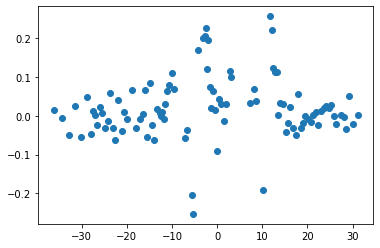

In [305]:
from matplotlib import pyplot as plt
plt.scatter(
    gpr.x_u.flatten().detach(),
    gpr.f_u_mu.flatten().detach())

In [217]:
list(gpr.named_parameters())

[('log_sigma',
  Parameter containing:
  tensor(-0.1008, requires_grad=True)),
 ('x_u',
  Parameter containing:
  tensor([[ 0.7333,  0.2486, -0.6387,  ...,  0.0717,  0.5245, -0.1372],
          [-0.9609,  0.1871, -0.3700,  ..., -0.3782, -1.0935,  0.2507],
          [-0.2620,  0.2816,  0.3131,  ..., -0.2865,  0.6299,  0.4968],
          ...,
          [-0.0479, -0.4868, -0.3918,  ..., -0.2032,  0.3719,  1.1004],
          [ 0.8799,  0.5422,  0.6025,  ...,  0.9551,  0.4557, -0.6581],
          [-0.1981,  0.0781,  0.3660,  ..., -0.2745, -0.8799,  0.7154]],
         requires_grad=True)),
 ('f_u_s_diag',
  Parameter containing:
  tensor([ 0.0681,  0.0358,  0.0414,  0.0399,  0.0998,  0.0303,  0.0252, -0.0077,
           0.1071,  0.0389,  0.0535,  0.0383,  0.0321,  0.0054,  0.0801,  0.0765,
           0.0094,  0.0636,  0.0951,  0.0715,  0.1215,  0.0887,  0.1114,  0.0338,
           0.1189,  0.1102,  0.0870, -0.0151,  0.0659,  0.0661,  0.0492,  0.0354,
           0.0690, -0.0075,  0.0372, -0.0